In [1]:
import numpy as np
from scipy import io
import sys
sys.path.append('/home/ysilvy/Density_bining/Yona_analysis/programs/')
#sys.path.append('/Users/Yona 1/Documents/Thèse/Density_bining/Yona_analysis/programs/') # From local
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from maps_matplot_lib import defVarDurack, zonal_2D, custom_div_cmap
import datetime

In [2]:
import matplotlib as mpl
mpl.rcParams['hatch.linewidth'] = 0.5

In [3]:
# ===== Workspace =====

indir = '/data/ysilvy/Density_binning/obs/'
#indir = '/Users/Yona 1/Documents/Thèse/Data/' #Local
file = 'fig9.mat'
data = indir + file

f = io.loadmat(data)

#out = 'save' # View or save output figure
out = 'view'


In [4]:
# ===== Read variables =====

var_change_p = f['chgPacific'].T
var_change_err_p = f['chgerrPacific'].T
var_change_a = f['chgAtlantic'].T
var_change_err_a = f['chgerrAtlantic'].T
var_change_i = f['chgIndian'].T
var_change_err_i = f['chgerrIndian'].T

lat=f['yi'].squeeze()
density = f['ocean_levels'].squeeze()

# -- Define variable properties
varname = defVarDurack('salinity'); v = 'S'
minmax = varname['minmax_zonal']
clevsm = varname['clevsm_zonal']
clevsm_bold = varname['clevsm_bold']
legVar = varname['legVar']
unit = varname['unit']

# -- Density domain
rhomin = 21
rhomid = 26
rhomax = 28
domrho = [rhomin, rhomid, rhomax]

In [5]:
# ===== Create variable bundles =====
varPac = {'name': 'Pacific', 'var_change': var_change_p, 'var_mean': None, 'var_error': var_change_err_p,
          'bowl1': None, 'bowl2': None, 'labBowl': [None,None]}
varAtl = {'name': 'Atlantic', 'var_change': var_change_a, 'var_mean': None, 'var_error': var_change_err_a,
          'bowl1': None, 'bowl2': None, 'labBowl': [None,None]}
varInd = {'name': 'Indian', 'var_change': var_change_i, 'var_mean': None, 'var_error': var_change_err_i,
          'bowl1': None, 'bowl2': None, 'labBowl': [None,None]}

In [6]:
DW10_boxes_dict = {'SO_subpolar_atl':[-55,-40,27.4,27.7], 'SO_subpolar_pac':[-68,-60,27.5,28], 'SO_subpolar_ind':[-60,-50,27.5,27.9],
             'SH_subtropics_atl':[-45,-32,26.7,27.1], 'SH_subtropics_pac':[-35,-20,26.1,26.8], 'SH_subtropics_ind':[-40,-15,26.6,27.1],
             'NH_subtropics_atl':[25,40,25.6,26.4], 'NH_subtropics_pac':[15,40,24.6,25.8],
             'subpolar_northpac':[50,57,26.2,27]}
DW10_boxes = np.array([[-55,-40,27.4,27.7],[-68,-60,27.5,28],[-60,-50,27.5,27.9],
                       [-45,-32,26.7,27.1],[-35,-20,26.1,26.8],[-40,-15,26.6,27.1],
                      [25,40,25.6,26.4],[15,40,24.6,25.8],[50,57,26.2,27]])
regions = ['SO_subpolar_atl', 'SO_subpolar_pac', 'SO_subpolar_ind', 'SH_subtropics_atl', 'SH_subtropics_pac', 'SH_subtropics_ind', 'NH_subtropics_atl', 'NH_subtropics_pac', 'subpolar_northpac']

/home/ysilvy/Density_bining/Yona_analysis/programs/maps_matplot_lib.py:172: RuntimeWarning: invalid value encountered in less
  not_signif_change = np.where(np.absolute(var) < var_er, 1, 0)


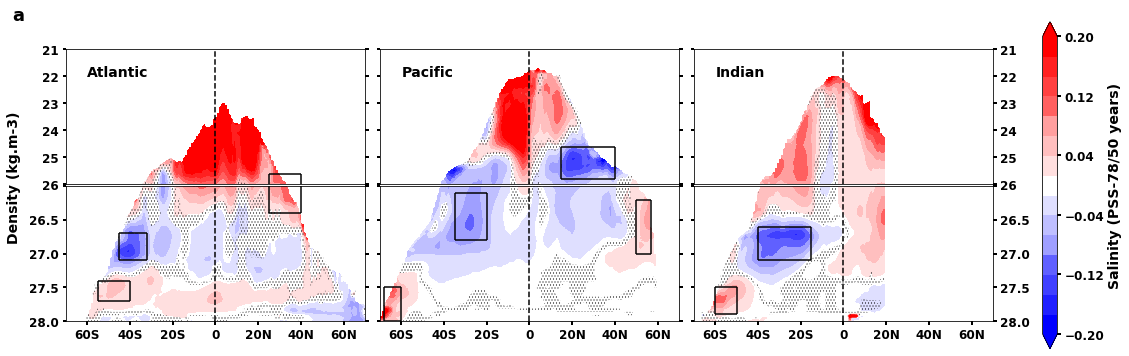

In [7]:
# ===== Plot =====
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(17,5))

levels = np.linspace(minmax[0], minmax[1], minmax[2])
cmap = custom_div_cmap()

cnplot = zonal_2D(plt, 'total', axes[0,0], axes[1,0], 'left', lat, density, varAtl, domrho, cmap, levels, clevsm, clevsm_bold)

cnplot = zonal_2D(plt, 'total', axes[0,1], axes[1,1], 'mid', lat, density, varPac, domrho, cmap, levels, clevsm, clevsm_bold)

cnplot = zonal_2D(plt, 'total', axes[0,2], axes[1,2], 'right', lat, density, varInd, domrho, cmap, levels, clevsm, clevsm_bold)

for ax in axes.ravel().tolist():
    ax.tick_params(axis='both', which='major', labelsize=12)

# -- Plot boxes    
for i in range(3):
    # Southern Ocean subpolar
    axes[1,i].hlines(y=(DW10_boxes[i][2],DW10_boxes[i][3]),xmin=DW10_boxes[i][0],xmax=DW10_boxes[i][1])
    axes[1,i].vlines(x=(DW10_boxes[i][0],DW10_boxes[i][1]),ymin=DW10_boxes[i][2],ymax=DW10_boxes[i][3])
    # SH subtropics
    axes[1,i].hlines(y=(DW10_boxes[i+3][2],DW10_boxes[i+3][3]),xmin=DW10_boxes[i+3][0],xmax=DW10_boxes[i+3][1])
    axes[1,i].vlines(x=(DW10_boxes[i+3][0],DW10_boxes[i+3][1]),ymin=DW10_boxes[i+3][2],ymax=DW10_boxes[i+3][3])
# NH subtropics atlantic
for i in range(2):
    axes[i,0].hlines(y=(DW10_boxes[6][2],DW10_boxes[6][3]),xmin=DW10_boxes[6][0],xmax=DW10_boxes[6][1])
    axes[i,0].vlines(x=(DW10_boxes[6][0],DW10_boxes[6][1]),ymin=DW10_boxes[6][2],ymax=DW10_boxes[6][3])
# NH subtropics pacific
axes[0,1].hlines(y=(DW10_boxes[7][2],DW10_boxes[7][3]),xmin=DW10_boxes[7][0],xmax=DW10_boxes[7][1])
axes[0,1].vlines(x=(DW10_boxes[7][0],DW10_boxes[7][1]),ymin=DW10_boxes[7][2],ymax=DW10_boxes[7][3])
# Subpolar north pacific
axes[1,1].hlines(y=(DW10_boxes[8][2],DW10_boxes[8][3]),xmin=DW10_boxes[8][0],xmax=DW10_boxes[8][1])
axes[1,1].vlines(x=(DW10_boxes[8][0],DW10_boxes[8][1]),ymin=DW10_boxes[8][2],ymax=DW10_boxes[8][3])
    
plt.subplots_adjust(hspace=.012, wspace=0.05, left=0.05, right=0.86)

cb = plt.colorbar(cnplot[0], ax=axes.ravel().tolist(), ticks=levels[::3], fraction=0.015, shrink=2.0, pad=0.05)
cb.set_label('%s (%s/50 years)' % (legVar, unit), fontweight='bold',fontsize=14)
cb.ax.set_yticklabels(cb.ax.get_yticklabels(), fontweight='bold')
cb.ax.yaxis.set_tick_params(which='major',width=2, labelsize=12)

plt.figtext(.006,.96,'a',fontweight='bold',fontsize=18)

name = 'Durack & Wijffels'
plotTitle = '%s changes (2000-1950), %s' %(legVar, name)
plotName = 'suppfig1a'
figureDir = 'obs/zonal_ys/'

#plt.suptitle(plotTitle, fontweight='bold', fontsize=14, verticalalignment='top')
plt.figtext(.002,.35,'Density (kg.m-3)',rotation='vertical',horizontalalignment='left',fontweight='bold',fontsize=14)

plt.savefig(plotName+'.png', bbox_inches='tight', dpi=150)